## Exemplo 1

Esse notebook contém um exemplo básico de como utilizarmos o OR-Tools e o GLOP para a solução de um problema de Programação Linear com duas variáveis. O problema em si não possui interpretação econômica, apenas um exemplo numérico.

>$\text{maximize } 3x_1 + 5x_2$
>
>Sujeito às restrições:
>
>$ 0.50x_1 + 0.20x_2 \le 16$ (Eq. 1)
>
>$ 0.25x_1 + 0.30x_2 \le 11$ (Eq. 2)
>
>$ 0.25x_1 + 0.50x_2 \le 15$ (Eq. 3)
>
>$ x_1, x_2 \ge 0$

De acordo com as equações acima, temos as interseções das seguintes equações nos seguintes pontos:

* As retas das equações 1 e 2 se interceptam nos pontos $x_1 = 25$ e $x_2 = 17.5$
* As retas das equações 2 e 3 se interceptam nos pontos $x_1 = 20$ e $x_2 = 20$ 

As equações 1 e 3 não se interceptam na região factível, logo não foram calculadas.

In [ ]:
# Instalando os pacotes necessários:
!pip install numpy scipy matplotlib ortools

In [1]:
# Módulos para manipulação numérica, gráficos e solver
import numpy as np
import matplotlib.pyplot as plt

from ortools.linear_solver import pywraplp

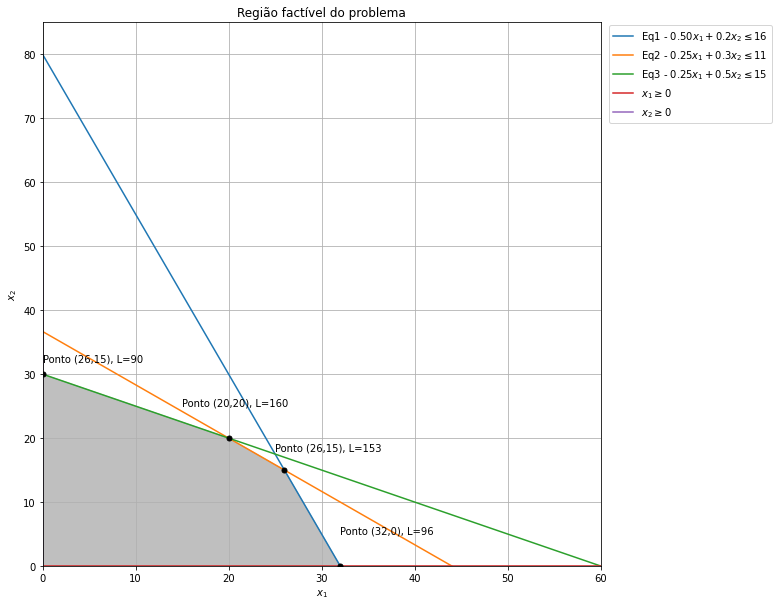

In [2]:
# no caso, x1 - criação de 2000 pontos entre 0 e 60 em x1
x = np.linspace(0, 60, 2000)

# restrição 1
r1 = (16 - 0.5*x)/0.2

# restrição 2
r2 = (11 - 0.25*x)/0.3

# restrição 3
r3 = (15 - 0.25*x)/0.5

# restrição 4
r4 = (x * 0)

# restrição 5
r5 = x

## Plot da região factível (feasible region)
plt.figure(figsize=(10,10))
plt.plot(x, r1, label='Eq1 - $0.50x_1 + 0.2x_2 \leq 16$')
plt.plot(x, r2, label='Eq2 - $0.25x_1 + 0.3x_2 \leq 11$')
plt.plot(x, r3, label='Eq3 - $0.25x_1 + 0.5x_2 \leq 15$')
plt.plot(x, r4, label='$x_1 \geq 0$')
plt.plot(r4, r5, label='$x_2 \geq 0$')

# Preenchimento da região factível 
fr1 = np.minimum(r2, r3)
fr2 = np.minimum(r1, fr1)
plt.fill_between(x, fr2, r4, where=(fr2<=fr1), color='grey', alpha=0.5, interpolate=True)

# Marcando pontos extremos e lucro
plt.text(15,25,'Ponto (20,20), L=160')
plt.plot(20,20,marker='o',markersize=5, color='k')

plt.text(25,18,'Ponto (26,15), L=153')
plt.plot(26,15,marker='o',markersize=5, color='k')

plt.text(32,5,'Ponto (32,0), L=96')
plt.plot(32,0,marker='o',markersize=5, color='k')

plt.text(0,32,'Ponto (26,15), L=90')
plt.plot(0,30,marker='o',markersize=5, color='k')

# Limites de regiões
plt.xlim(0, max(x))
plt.ylim(0, 85)
plt.title('Região factível do problema')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.3)
plt.grid()
plt.show()

In [3]:
# Solver de LP baseado no glop
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variáveis do problema
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(0, solver.infinity(), 'x2')

# Definição da função objetivo
solver.Maximize(3*x1 + 5*x2)

# Definição das restrições do problema (Constraints)
solver.Add(0.50*x1 + 0.2*x2 <= 16.0) # restrição 1
solver.Add(0.25*x1 + 0.3*x2 <= 11.0) # restrição 2
solver.Add(0.25*x1 + 0.5*x2 <= 15.0) # restrição 3

# Verificando a quantidade de restrições
print(f'Número de restrições do problema: {solver.NumConstraints()}')

# Executando o solver
status = solver.Solve()

Número de restrições do problema: 3


In [4]:
# Verifica se o solver já encontrou a solução do problema
if status == pywraplp.Solver.OPTIMAL:
    print('Solução:')
    print('Valor máximo = ', solver.Objective().Value())
    print('Valor de x1 =', x1.solution_value())
    print('Valor de x2 =', x2.solution_value())

else:
    print('O problema não possui solução ótima')

Solução:
Valor máximo =  160.0
Valor de x1 = 19.99999999999999
Valor de x2 = 20.000000000000007
